In [1]:
import config
import torch
import torch.optim as optim

from tqdm import tqdm
from collections import Counter

import lightning.pytorch as pl
from lightning.pytorch.callbacks import Callback
from lightning.pytorch.callbacks import ModelCheckpoint

from model_pl import YOLOv3Lightning
from tqdm import tqdm
import os
from utils import get_loaders
import warnings
warnings.filterwarnings("ignore")

In [2]:
EPOCHS = config.NUM_EPOCHS * 2 // 5

train_loader, test_loader, train_eval_loader = get_loaders(train_csv_path=config.DATASET + "/train.csv", test_csv_path=config.DATASET + "/test.csv")
print(len(train_loader),len(test_loader),len(train_eval_loader))

518 155 518


In [3]:
model = YOLOv3Lightning(num_classes=config.NUM_CLASSES,len_train_loader=len(train_loader))

In [4]:
class MyPrintingCallback(Callback):
    def on_train_start(self, trainer, pl_module):
        print("Training is starting")

    def on_train_end(self, trainer, pl_module):
        print("Training is ending")
        
class Printepoch(pl.Callback):
    def on_epoch_end(self, trainer, pl_module):
        print(f"Epoch {trainer.current_epoch}")

In [5]:
checkpoint_callback = ModelCheckpoint(filename="pl_checkpoint", verbose=True, save_on_train_epoch_end=True)

In [6]:
class PascalDataModule(pl.LightningDataModule):
    def __init__(self, data_dir: str = "./"):
        super().__init__()

    def train_dataloader(self):
        return train_loader

    def val_dataloader(self):
        return train_eval_loader

    def test_dataloader(self):
        return test_loader

    def predict_dataloader(self):
        return test_loader

In [7]:
data = PascalDataModule()

Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name    | Type       | Params
---------------------------------------
0 | layers  | ModuleList | 61.6 M
1 | loss_fn | YoloLoss   | 0     
---------------------------------------
61.6 M    Trainable params
0         Non-trainable params
61.6 M    Total params
246.506   Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch: 0  -> {'val loss': 46.57415008544922, 'Obj val accuracy': '100.000000%', 'No obj val accuracy is': '0.000000%', 'Class val accuracy is': '14.529915%'}
Training is starting


Training: 0it [00:00, ?it/s]

Epoch: 0  -> {'train loss': 13.227702140808105, 'Obj train accuracy': '70.000000%', 'No obj train accuracy is': '63.798397%', 'Class train accuracy is': '20.000000%'}
Epoch: 1  -> {'train loss': 15.255226135253906, 'Obj train accuracy': '18.750000%', 'No obj train accuracy is': '97.554558%', 'Class train accuracy is': '6.250000%'}


Validation: 0it [00:00, ?it/s]

Epoch: 2  -> {'val loss': 13.51653003692627, 'Obj val accuracy': '6.666667%', 'No obj val accuracy is': '98.826973%', 'Class val accuracy is': '26.666668%'}
Epoch: 2  -> {'train loss': 13.752754211425781, 'Obj train accuracy': '41.666664%', 'No obj train accuracy is': '98.458504%', 'Class train accuracy is': '10.416666%'}
Epoch: 3  -> {'train loss': 11.997743606567383, 'Obj train accuracy': '45.454548%', 'No obj train accuracy is': '97.893402%', 'Class train accuracy is': '36.363636%'}
Epoch: 4  -> {'train loss': 11.044301986694336, 'Obj train accuracy': '10.256411%', 'No obj train accuracy is': '97.700539%', 'Class train accuracy is': '43.589745%'}


Validation: 0it [00:00, ?it/s]

Epoch: 5  -> {'val loss': 12.474379539489746, 'Obj val accuracy': '23.333334%', 'No obj val accuracy is': '98.769028%', 'Class val accuracy is': '33.333336%'}
Epoch: 5  -> {'train loss': 8.983352661132812, 'Obj train accuracy': '66.666672%', 'No obj train accuracy is': '97.395866%', 'Class train accuracy is': '47.619049%'}
Epoch: 6  -> {'train loss': 11.352375984191895, 'Obj train accuracy': '50.000000%', 'No obj train accuracy is': '97.313850%', 'Class train accuracy is': '16.666668%'}
Epoch: 7  -> {'train loss': 12.3477783203125, 'Obj train accuracy': '46.296295%', 'No obj train accuracy is': '97.018456%', 'Class train accuracy is': '25.925926%'}


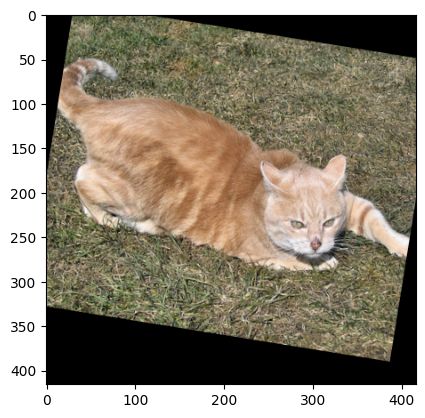

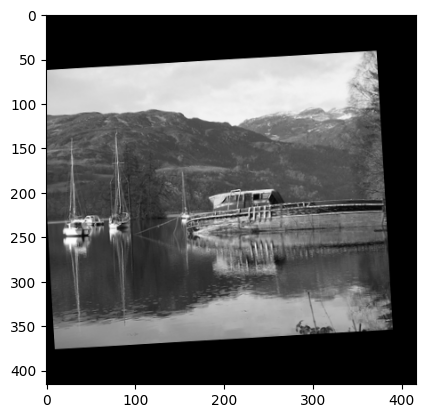

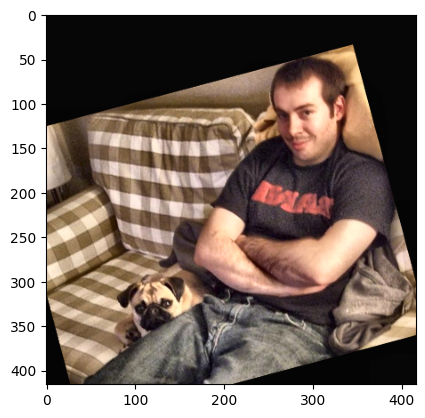

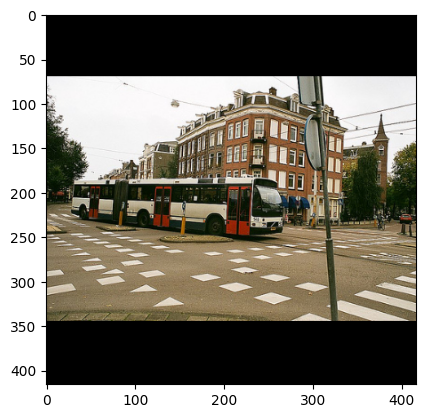

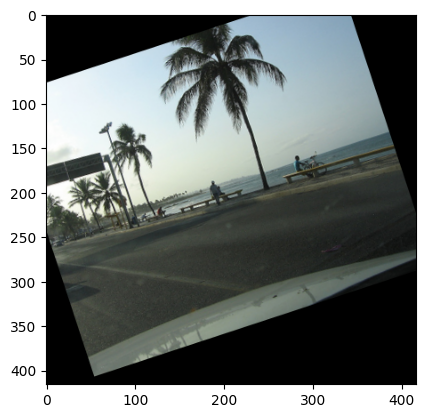

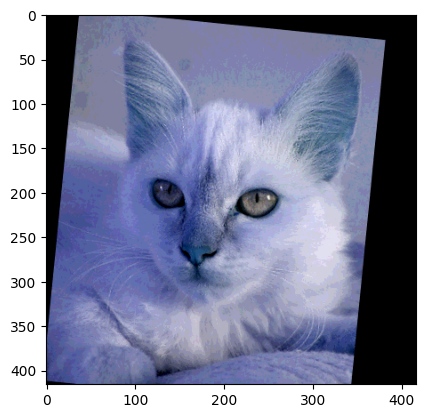

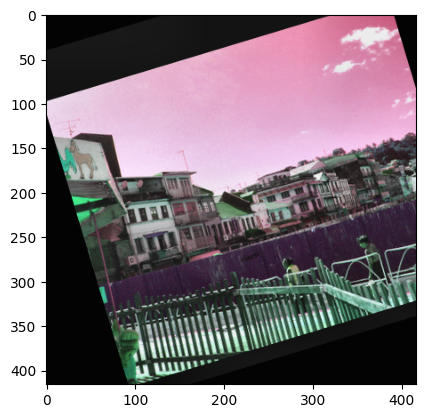

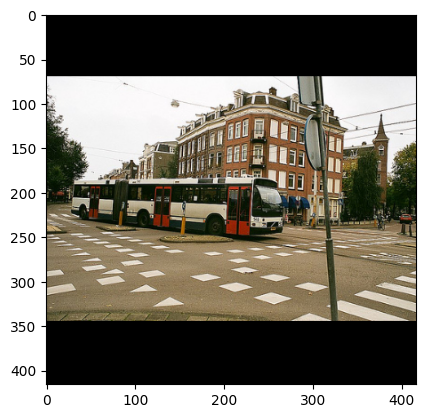

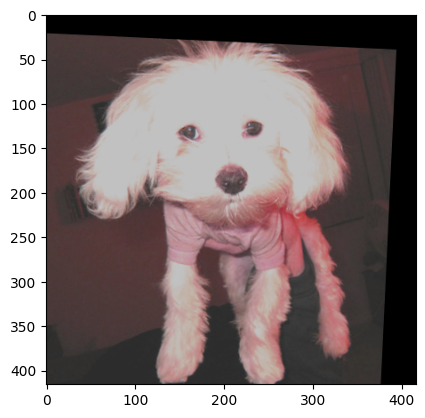

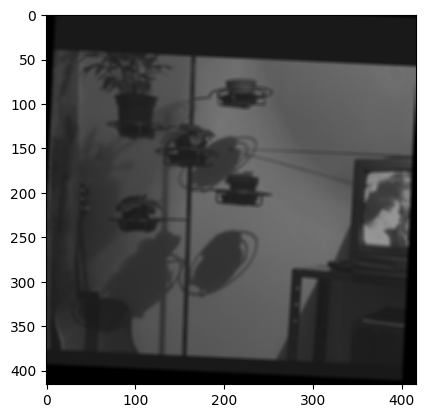

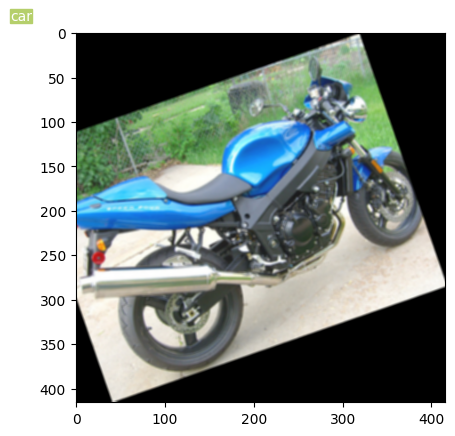

Validation: 0it [00:00, ?it/s]

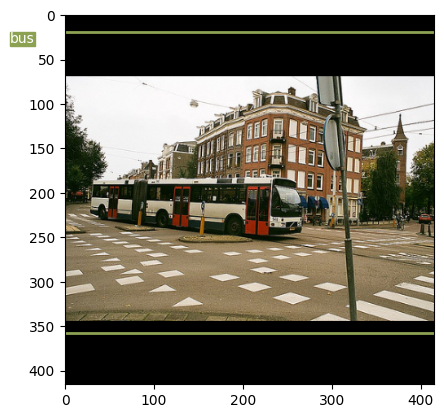

Epoch: 8  -> {'val loss': 11.156707763671875, 'Obj val accuracy': '20.000000%', 'No obj val accuracy is': '98.191132%', 'Class val accuracy is': '50.000000%'}
Epoch: 8  -> {'train loss': 7.725205421447754, 'Obj train accuracy': '55.072464%', 'No obj train accuracy is': '97.211990%', 'Class train accuracy is': '60.869564%'}


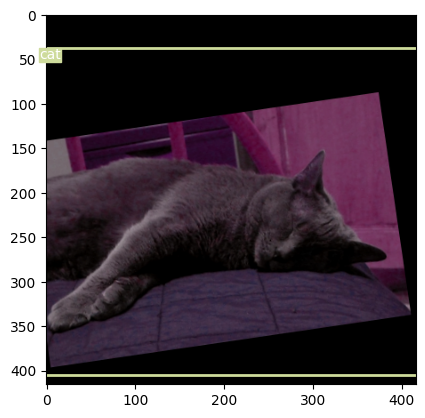

Epoch: 9  -> {'train loss': 7.114060878753662, 'Obj train accuracy': '46.296295%', 'No obj train accuracy is': '97.441559%', 'Class train accuracy is': '66.666672%'}


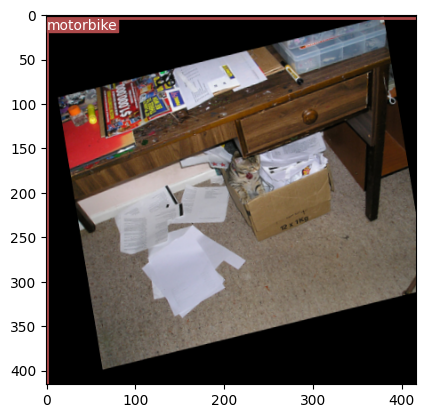

Epoch: 10  -> {'train loss': 10.025520324707031, 'Obj train accuracy': '60.606064%', 'No obj train accuracy is': '97.183937%', 'Class train accuracy is': '54.545456%'}


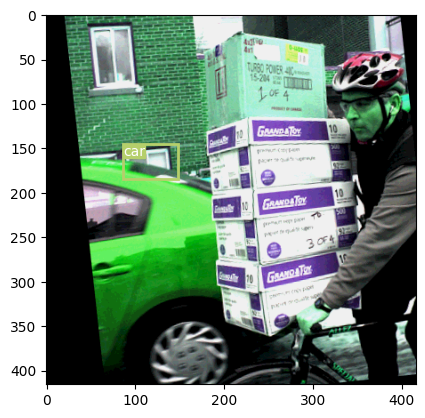

Validation: 0it [00:00, ?it/s]

Epoch: 11  -> {'val loss': 11.570178985595703, 'Obj val accuracy': '43.333332%', 'No obj val accuracy is': '98.471466%', 'Class val accuracy is': '43.333332%'}
Epoch: 11  -> {'train loss': 11.762211799621582, 'Obj train accuracy': '23.611111%', 'No obj train accuracy is': '98.003319%', 'Class train accuracy is': '45.833336%'}


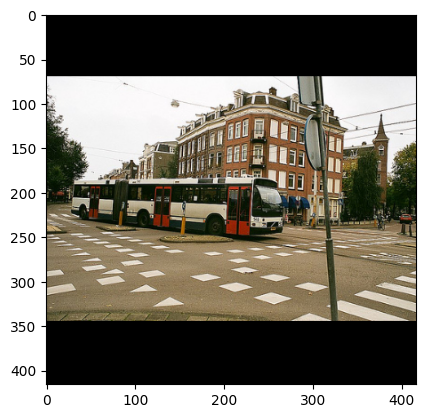

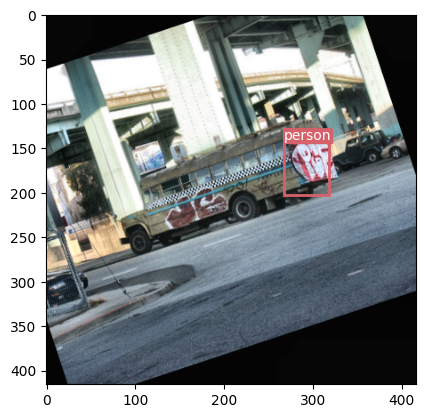

Epoch: 12  -> {'train loss': 5.917430877685547, 'Obj train accuracy': '87.878784%', 'No obj train accuracy is': '97.052284%', 'Class train accuracy is': '69.696968%'}


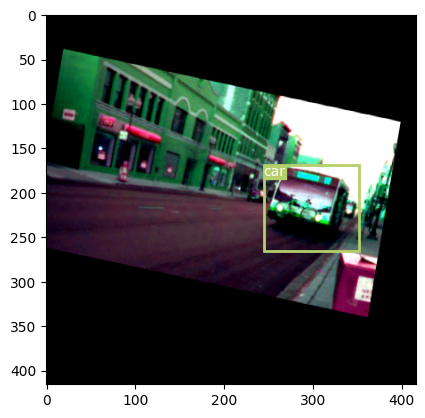

Epoch: 13  -> {'train loss': 7.8535895347595215, 'Obj train accuracy': '93.333336%', 'No obj train accuracy is': '97.877838%', 'Class train accuracy is': '46.666668%'}


Validation: 0it [00:00, ?it/s]

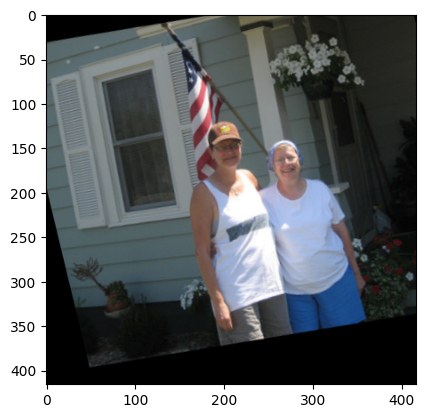

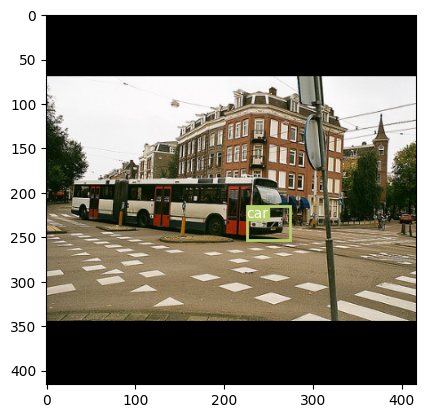

Epoch: 14  -> {'val loss': 11.829580307006836, 'Obj val accuracy': '53.333336%', 'No obj val accuracy is': '97.696236%', 'Class val accuracy is': '46.666668%'}
Epoch: 14  -> {'train loss': 5.4922003746032715, 'Obj train accuracy': '62.745102%', 'No obj train accuracy is': '97.380501%', 'Class train accuracy is': '70.588234%'}


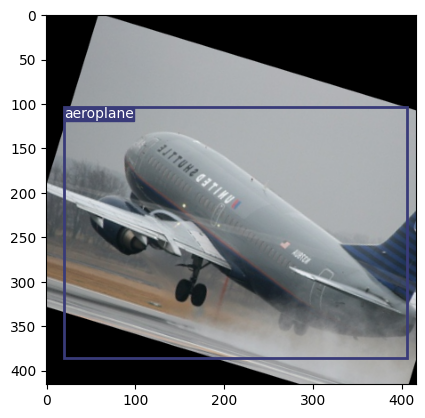

Epoch: 15  -> {'train loss': 7.533836841583252, 'Obj train accuracy': '54.166668%', 'No obj train accuracy is': '97.590591%', 'Class train accuracy is': '75.000000%'}
Epoch: 16  -> {'train loss': 9.306282997131348, 'Obj train accuracy': '45.833336%', 'No obj train accuracy is': '97.904694%', 'Class train accuracy is': '50.000000%'}


Validation: 0it [00:00, ?it/s]

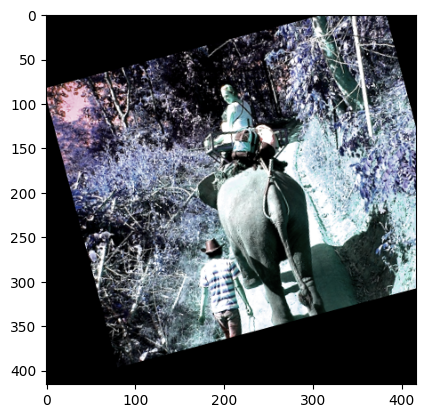

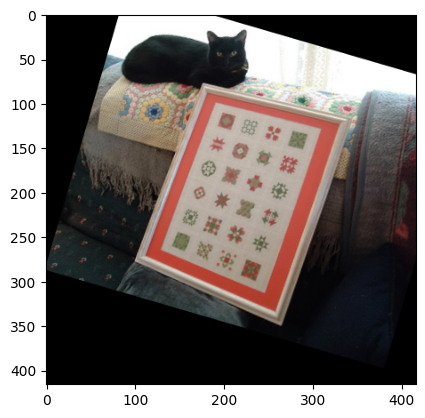

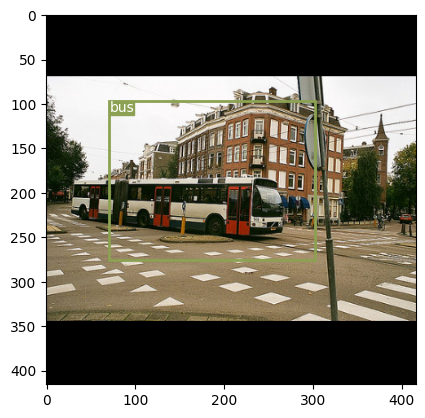

Epoch: 17  -> {'val loss': 11.134127616882324, 'Obj val accuracy': '50.000000%', 'No obj val accuracy is': '98.023552%', 'Class val accuracy is': '50.000000%'}
Epoch: 17  -> {'train loss': 6.273373603820801, 'Obj train accuracy': '74.509804%', 'No obj train accuracy is': '97.673470%', 'Class train accuracy is': '58.823532%'}


In [ ]:
trainer = pl.Trainer(max_epochs=EPOCHS, 
                  precision="16-mixed", 
                  accelerator="gpu", 
                  devices=[3], 
                  check_val_every_n_epoch=3,
                  callbacks=[MyPrintingCallback(),
                             checkpoint_callback,Printepoch()])  # precision=16 enables AMP
trainer.fit(model,datamodule=data)

In [ ]:
mapval = mean_average_precision(
    pred_boxes,
    true_boxes,
    iou_threshold=config.MAP_IOU_THRESH,
    box_format="midpoint",
    num_classes=config.NUM_CLASSES,
)
print(f"MAP: {mapval.item()}")

In [ ]:
trainer.save_checkpoint("lightingYolo3_org.ckpt")